In [ ]:
link=r'C:\Users\kumar\Downloads\5m-Sales-Records\5m.csv'

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

8

In [ ]:
pip install modin[all]

  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)



ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
tensorflow 2.0.0 requires gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.


  Created wheel for gpustat: filename=gpustat-0.6.0-py3-none-any.whl size=12626 sha256=f00893099bb08216f0691019d1780095df42b68142c461403d37f67b1f31a162
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\50\da\35\fe2cfb3bc47822299f5e124a599d56f00b30ec0b328db16b9f
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19196 sha256=fa46a833a4ca8d7f77fc3352f03c8630c92dd57390c0782bf0074d680f9a0ca9
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\7f\26\a3\33f2079871e2bebb3f53a2b21c3ec64129b8efdd18a6263a52
Successfully built gpustat nvidia-ml-py3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.6.0
    Uninstalling cloudpickle-1.6.0:
      Successfully uninstalled cloudpickle-1.6.0
  Attempting uninstall: grpcio
    Found existing installat

In [ ]:
import time
import ray

In [ ]:
ray.init(num_cpus=4)
import modin.pandas as mpd
start=time.time()
df=mpd.read_csv(link)
end=time.time()
ray.shutdown()
print(end-start)

2020-12-21 16:59:36,483	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


9.983450889587402


In [ ]:
ray.init(num_cpus=3)
import modin.pandas as mpd
start=time.time()
df=mpd.read_csv(link)
end=time.time()
ray.shutdown()
print(end-start)

2020-12-21 16:57:27,007	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


13.591470003128052


In [ ]:
ray.init(num_cpus=2)
import modin.pandas as mpd
start=time.time()
df=mpd.read_csv(link)
end=time.time()
ray.shutdown()
print(end-start)

2020-12-21 16:58:09,069	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


15.087735414505005


In [ ]:
ray.init(num_cpus=1)
import modin.pandas as mpd
start=time.time()
df=mpd.read_csv(link)
end=time.time()
ray.shutdown()
print(end-start)

2020-12-21 16:58:48,646	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


24.541160345077515


Specifying num_cpus limits the number of processors that Modin uses. You may also specify more processors than you have available on your machine, however this will not improve the performance (and might end up hurting the performance of the system).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
num_cores=['1 core cpu','2 core cpu','3 core cpu','4 core cpu']
time=[24.54, 15.08, 13.59, 9.98]

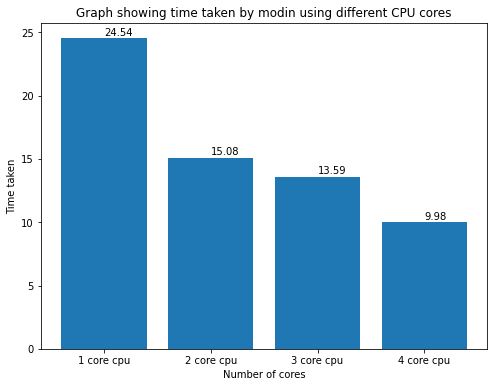

In [37]:
plt.figure(figsize=(8,6))
plt.bar(x=num_cores, height=time)
#plt.xticks(rotation=45)
plt.xlabel('Number of cores')
plt.ylabel('Time taken')
plt.title('Graph showing time taken by modin using different CPU cores')
for i in range(4):
  plt.text(x=num_cores[i], y=time[i]+0.25, s=time[i])
#for index, value in enumerate(time):
#  plt.text(value, index, str(value))
plt.show()

1. We know that modin uses all of the CPU cores present in the system. By observing the above graph we can say that as number of CPU cores is increases time decreases, and we can finally conclude that modin uses all CPU cores and its performance is based on number of cores available.
